In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels import *
from statsmodels.tsa.api import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()
import yfinance as yf
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
# Ticker Input
stock_ticker = '^FTSE'

In [3]:
tickerdata = yf.Ticker(stock_ticker)

In [4]:
ticker_df = tickerdata.history(period = '1d', start= '1994-1-1')

In [5]:
ticker_df = ticker_df[['Close']]

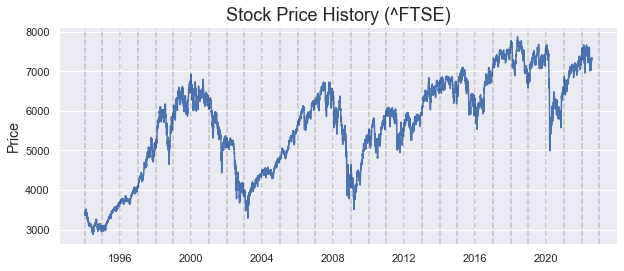

In [6]:
plt.figure(figsize = (10,4))
plt.plot(ticker_df.Close)
plt.title('Stock Price History (%s)' %stock_ticker, fontsize = 18)
plt.ylabel('Price' ,fontsize = 14)
for year in range(1994,2024):
    plt.axvline(pd.to_datetime(str(year)+ '-01-01'), color = 'k', linestyle= '--', alpha = 0.2)

In [7]:
ticker_df.head()

,Close
Date,
1993-12-31,3418.399902
1994-01-04,3408.500000
1994-01-05,3379.199951
1994-01-06,3403.000000
1994-01-07,3446.000000


In [8]:
ticker_df.isna().sum()

Close    0
dtype: int64

In [9]:
size = int(len(ticker_df)*0.8)
df_train, df_test = ticker_df.iloc[:size], ticker_df.iloc[size:]

In [10]:
def LLR_test(model_1, model_2, DF =1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

In [11]:
sts.adfuller(df_train.Close)

(-1.9422428491117498,
 0.31245696766405073,
 6,
 5767,
 {'1%': -3.431484422245044,
  '5%': -2.862041306637962,
  '10%': -2.567036843607018},
 63314.60169481613)

In [12]:
df_train['returns']= df_train.Close.pct_change(1).mul(100)
df_train = df_train.iloc[1:]


In [13]:
sts.adfuller(df_train.returns)

(-14.48782638632668,
 6.218892297285569e-27,
 34,
 5738,
 {'1%': -3.4314901582122896,
  '5%': -2.8620438409034294,
  '10%': -2.5670381926705117},
 17917.352432997533)

ACF & PACF Returns

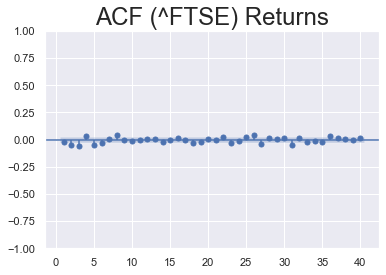

In [14]:
sgt.plot_acf(df_train.returns, lags = 40, zero = False)
plt.title ('ACF (%s) Returns' %stock_ticker , size = 24)
plt.show()

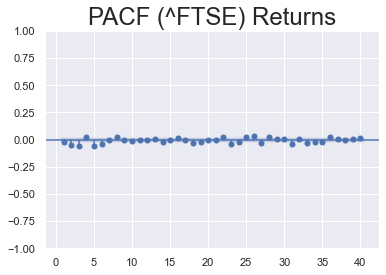

In [15]:
sgt.plot_pacf(df_train.returns, lags = 40, zero = False, method = ('ols'))
plt.title ('PACF (%s) Returns' %stock_ticker , size = 24)
plt.show()

In [16]:
model_ar_1 = AutoReg(df_train.returns, lags = 1)

In [17]:
results_ret_ar_1 = model_ar_1.fit()

In [18]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                returns   No. Observations:                 5773
Model:                     AutoReg(1)   Log Likelihood               -9035.692
Method:               Conditional MLE   S.D. of innovations              1.158
Date:                Thu, 28 Jul 2022   AIC                          18077.384
Time:                        16:56:42   BIC                          18097.367
Sample:                             1   HQIC                         18084.337
                                 5773                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.015      1.250      0.211      -0.011       0.049
returns.L1    -0.0200      0.013     -1.518      0.129      -0.046       0.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -50.0416           +0.0000j           50.0416            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
model_ar_2 = AutoReg(df_train.returns, lags = 2)

In [20]:
results_ar_2 = model_ar_2.fit()

In [21]:
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                returns   No. Observations:                 5773
Model:                     AutoReg(2)   Log Likelihood               -9027.313
Method:               Conditional MLE   S.D. of innovations              1.156
Date:                Thu, 28 Jul 2022   AIC                          18062.627
Time:                        16:56:43   BIC                          18089.269
Sample:                             2   HQIC                         18071.897
                                 5773                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0201      0.015      1.323      0.186      -0.010       0.050
returns.L1    -0.0210      0.013     -1.596      0.110      -0.047       0.005
returns.L2    -0.0493      0.013     -3.750      0.000      -0.075      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2128           -4.4982j            4.5032           -0.2575
AR.2           -0.2128           +4.4982j            4.5032            0.2575
-----------------------------------------------------------------------------
"""

In [22]:
LLR_test(model_ar_1, model_ar_2)

0.0

In [23]:
model_ar_3 = AutoReg(df_train.returns, lags = 3)
results_ret_ar_3 = model_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                returns   No. Observations:                 5773
Model:                     AutoReg(3)   Log Likelihood               -9014.805
Method:               Conditional MLE   S.D. of innovations              1.154
Date:                Thu, 28 Jul 2022   AIC                          18039.609
Time:                        16:56:45   BIC                          18072.912
Sample:                             3   HQIC                         18051.197
                                 5773                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0213      0.015      1.400      0.161      -0.009       0.051
returns.L1    -0.0240      0.013     -1.825      0.068      -0.050       0.002
returns.L2    -0.0506      0.013     -3.853      0.000      -0.076      -0.025
returns.L3    -0.0625      0.013     -4.756      0.000      -0.088      -0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9775           -2.1983j            2.4058           -0.1834
AR.2            0.9775           +2.1983j            2.4058            0.1834
AR.3           -2.7643           -0.0000j            2.7643           -0.5000
-----------------------------------------------------------------------------
"""

In [24]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [25]:
model_ar_4 = AutoReg(df_train.returns, lags = 4)
results_ret_ar_4 = model_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                returns   No. Observations:                 5773
Model:                     AutoReg(4)   Log Likelihood               -9010.972
Method:               Conditional MLE   S.D. of innovations              1.154
Date:                Thu, 28 Jul 2022   AIC                          18033.944
Time:                        16:56:46   BIC                          18073.906
Sample:                             4   HQIC                         18047.849
                                 5773                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0205      0.015      1.347      0.178      -0.009       0.050
returns.L1    -0.0224      0.013     -1.698      0.089      -0.048       0.003
returns.L2    -0.0490      0.013     -3.732      0.000      -0.075      -0.023
returns.L3    -0.0618      0.013     -4.702      0.000      -0.088      -0.036
returns.L4     0.0278      0.013      2.113      0.035       0.002       0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1330           -0.0000j            2.1330           -0.5000
AR.2            0.3926           -2.1373j            2.1731           -0.2211
AR.3            0.3926           +2.1373j            2.1731            0.2211
AR.4            3.5691           -0.0000j            3.5691           -0.0000
-----------------------------------------------------------------------------
"""

In [26]:
LLR_test(model_ar_3, model_ar_4)

0.006

In [27]:
model_ar_5 = AutoReg(df_train.returns, lags = 5)
results_ret_ar_5 = model_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                returns   No. Observations:                 5773
Model:                     AutoReg(5)   Log Likelihood               -9000.365
Method:               Conditional MLE   S.D. of innovations              1.152
Date:                Thu, 28 Jul 2022   AIC                          18014.729
Time:                        16:56:47   BIC                          18061.350
Sample:                             5   HQIC                         18030.951
                                 5773                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0217      0.015      1.431      0.153      -0.008       0.051
returns.L1    -0.0207      0.013     -1.576      0.115      -0.046       0.005
returns.L2    -0.0526      0.013     -3.999      0.000      -0.078      -0.027
returns.L3    -0.0646      0.013     -4.920      0.000      -0.090      -0.039
returns.L4     0.0265      0.013      2.018      0.044       0.001       0.052
returns.L5    -0.0575      0.013     -4.371      0.000      -0.083      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6220           -0.0000j            1.6220           -0.5000
AR.2           -0.3646           -1.7381j            1.7759           -0.2829
AR.3           -0.3646           +1.7381j            1.7759            0.2829
AR.4            1.4064           -1.1930j            1.8442           -0.1120
AR.5            1.4064           +1.1930j            1.8442            0.1120
-----------------------------------------------------------------------------
"""

In [28]:
LLR_test(model_ar_4, model_ar_5)

0.0

In [29]:
model_ar_6 = AutoReg(df_train.returns, lags = 6)
results_ret_ar_6 = model_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                returns   No. Observations:                 5773
Model:                     AutoReg(6)   Log Likelihood               -8994.774
Method:               Conditional MLE   S.D. of innovations              1.151
Date:                Thu, 28 Jul 2022   AIC                          18005.548
Time:                        16:56:49   BIC                          18058.827
Sample:                             6   HQIC                         18024.087
                                 5773                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0227      0.015      1.496      0.135      -0.007       0.052
returns.L1    -0.0230      0.013     -1.745      0.081      -0.049       0.003
returns.L2    -0.0514      0.013     -3.914      0.000      -0.077      -0.026
returns.L3    -0.0671      0.013     -5.099      0.000      -0.093      -0.041
returns.L4     0.0244      0.013      1.854      0.064      -0.001       0.050
returns.L5    -0.0583      0.013     -4.436      0.000      -0.084      -0.033
returns.L6    -0.0388      0.013     -2.952      0.003      -0.065      -0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2954           -0.9210j            1.5895           -0.0984
AR.2            1.2954           +0.9210j            1.5895            0.0984
AR.3           -0.1148           -1.5853j            1.5894           -0.2615
AR.4           -0.1148           +1.5853j            1.5894            0.2615
AR.5           -1.9309           -0.5518j            2.0082           -0.4557
AR.6           -1.9309           +0.5518j            2.0082            0.4557
-----------------------------------------------------------------------------
"""

In [30]:
LLR_test(model_ar_5, model_ar_6)

0.001

In [31]:
model_ar_7 = AutoReg(df_train.returns, lags = 7)
results_ret_ar_7 = model_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                returns   No. Observations:                 5773
Model:                     AutoReg(7)   Log Likelihood               -8993.092
Method:               Conditional MLE   S.D. of innovations              1.151
Date:                Thu, 28 Jul 2022   AIC                          18004.185
Time:                        16:56:50   BIC                          18064.123
Sample:                             7   HQIC                         18025.041
                                 5773                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0230      0.015      1.514      0.130      -0.007       0.053
returns.L1    -0.0232      0.013     -1.759      0.079      -0.049       0.003
returns.L2    -0.0516      0.013     -3.920      0.000      -0.077      -0.026
returns.L3    -0.0668      0.013     -5.079      0.000      -0.093      -0.041
returns.L4     0.0243      0.013      1.846      0.065      -0.001       0.050
returns.L5    -0.0586      0.013     -4.449      0.000      -0.084      -0.033
returns.L6    -0.0389      0.013     -2.958      0.003      -0.065      -0.013
returns.L7    -0.0023      0.013     -0.177      0.859      -0.028       0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2945           -0.9047j            1.5793           -0.0971
AR.2            1.2945           +0.9047j            1.5793            0.0971
AR.3           -0.0998           -1.5947j            1.5978           -0.2599
AR.4           -0.0998           +1.5947j            1.5978            0.2599
AR.5           -2.0611           -0.5022j            2.1214           -0.4620
AR.6           -2.0611           +0.5022j            2.1214            0.4620
AR.7          -14.9333           -0.0000j           14.9333           -0.5000
-----------------------------------------------------------------------------
"""

In [32]:
LLR_test(model_ar_6, model_ar_7)

0.067

In [33]:
#stop here and use the AR(6) model